In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
print(os.listdir(BASE_PATH))


['Bening_Final', 'DDoS-SYN_Flood', 'DoS-HTTP_Flood', 'DictionaryBruteForce', 'Mirai-udpplain', 'Mirai-greeth_flood', 'Backdoor_Malware', 'BrowserHijacking', 'CommandInjection', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation', 'DDoS-PSHACK_FLOOD', 'DDoS-RSTFINFLOOD', 'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Fragmentation', 'DNS_Spoofing', 'DoS-SYN_Flood', 'DoS-TCP_Flood', 'DoS-UDP_Flood', 'Mirai-greip_flood', 'MITM-ArpSpoofing', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack', 'VulnerabilityScan', 'XSS']


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BASE_PATH = "/content/drive/MyDrive/CICIoT2023/CSV"
SAMPLE_FRAC = 0.1
SAVE_PATH = "ciciot2023_sampled.csv"

all_samples = []
full_dist = {}
sampled_dist = {}

def clean_df(df, label):
    df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col or 'Flow ID' in col or
                          'Src IP' in col or 'Dst IP' in col or 'Timestamp' in col], errors='ignore')
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    df = df.select_dtypes(include=[np.number])
    df = df.astype(np.float32)
    df['label'] = label
    return df

import glob

# Recursively find all .csv files in BASE_PATH
csv_files = glob.glob(os.path.join(BASE_PATH, "**", "*.csv"), recursive=True)
print(f"Found {len(csv_files)} CSV files")

all_before = []
all_samples = []

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    label = os.path.basename(os.path.dirname(file_path))  # Use folder name as label
    print(f"📄 Processing: {file_name} | Label: {label}")

    try:
        df = pd.read_csv(file_path)
        cleaned_df = clean_df(df, label)
        all_before.append(cleaned_df)

        sample = cleaned_df.sample(frac=SAMPLE_FRAC, random_state=42)
        all_samples.append(sample)
    except Exception as e:
        print(f"❌ Failed to process {file_name}: {e}")


# Combine data
before_df = pd.concat(all_before, ignore_index=True)
after_df = pd.concat(all_samples, ignore_index=True)

# Save locally
after_df.to_csv("ciciot2023_sampled.csv", index=False)
print("Saved as ciciot2023_sampled.csv")

# Combine data
before_df = pd.concat(all_before, ignore_index=True)
after_df = pd.concat(all_samples, ignore_index=True)

#  Save locally
after_df.to_csv("ciciot2023_sampled.csv", index=False)
print("Saved as ciciot2023_sampled.csv")


Found 211 CSV files
📄 Processing: Bening_Final.csv | Label: Bening_Final
📄 Processing: DoS-HTTP_Flood.csv | Label: DoS-HTTP_Flood
📄 Processing: DictionaryBruteForce.csv | Label: DictionaryBruteForce
📄 Processing: Mirai-udpplain.csv | Label: Mirai-udpplain
📄 Processing: Mirai-greeth_flood.csv | Label: Mirai-greeth_flood
📄 Processing: Backdoor_Malware.pcap.csv | Label: Backdoor_Malware
📄 Processing: BrowserHijacking.pcap.csv | Label: BrowserHijacking
📄 Processing: CommandInjection.pcap.csv | Label: CommandInjection
📄 Processing: DDoS-ACK_Fragmentation1.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Processing: DDoS-ACK_Fragmentation.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Processing: DDoS-ACK_Fragmentation2.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Processing: DDoS-ACK_Fragmentation3.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Processing: DDoS-ACK_Fragmentation4.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Processing: DDoS-ACK_Fragmentation5.pcap.csv | Label: DDoS-ACK_Fragmentation
📄 Proces

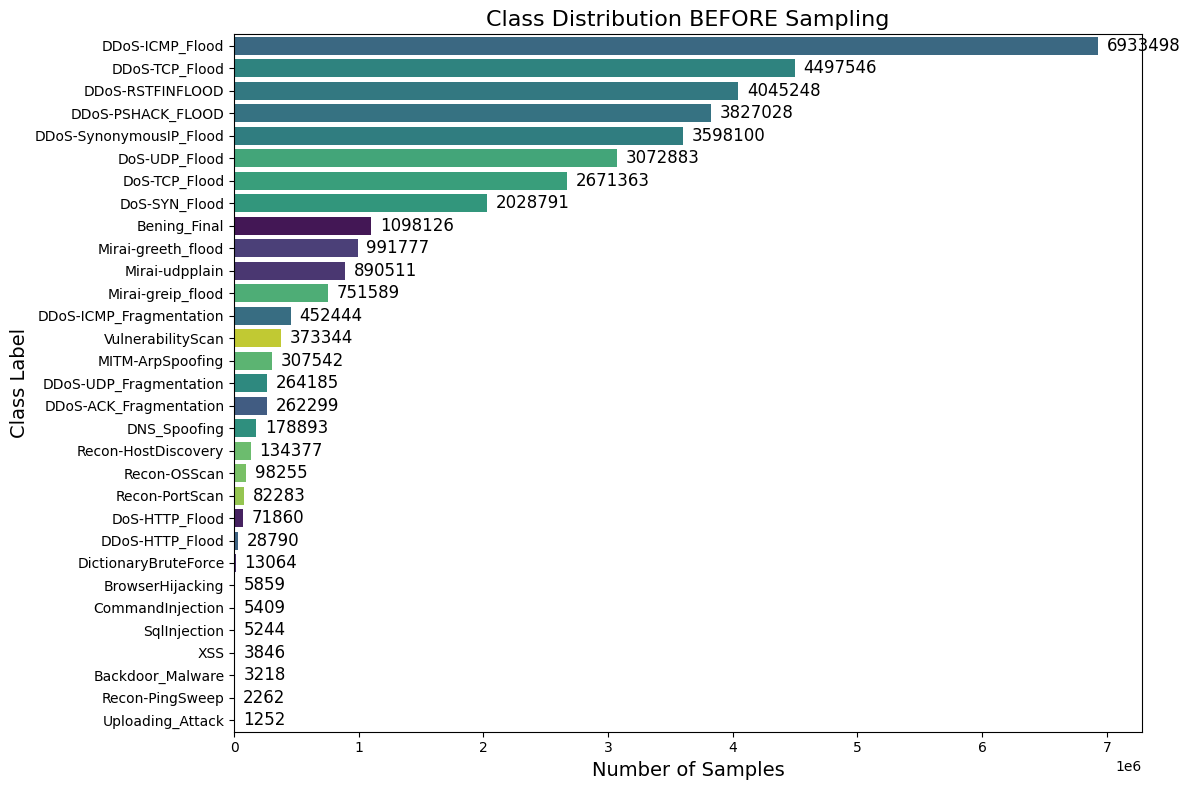

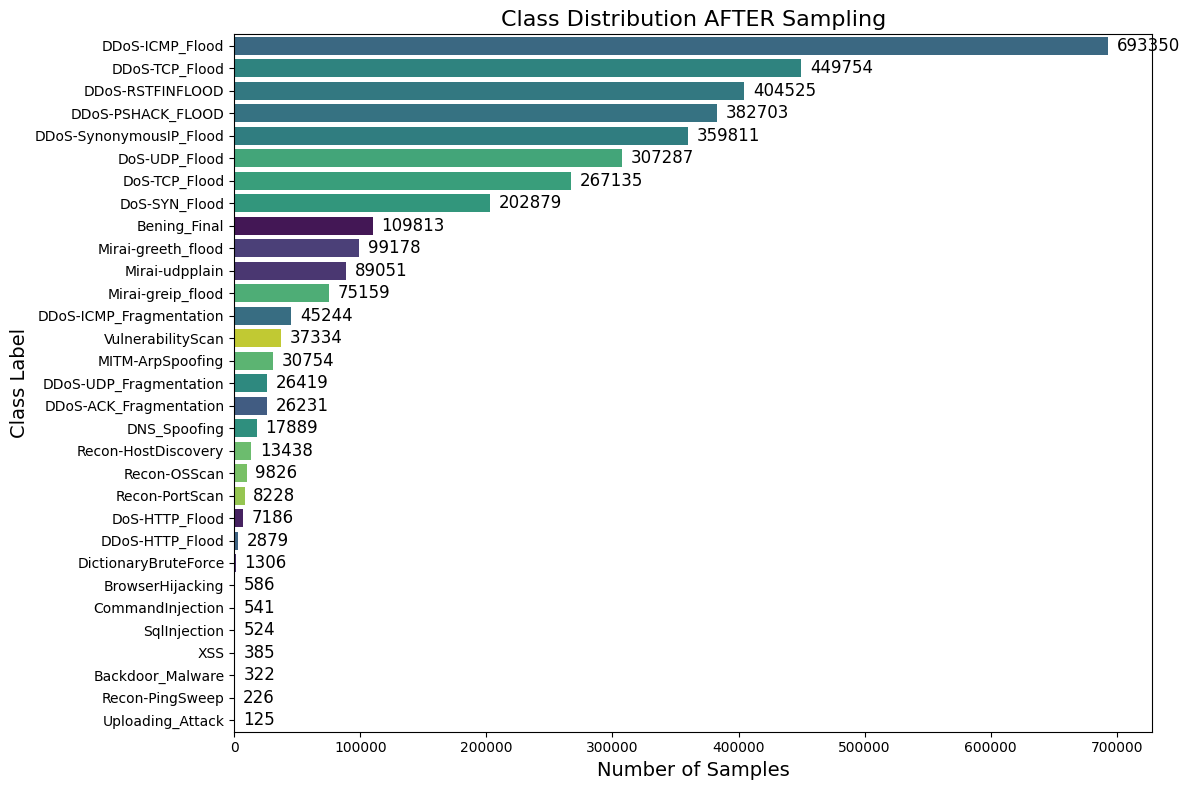

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(df, title):
    plt.figure(figsize=(12, 8))
    order = df['label'].value_counts().index
    sns.countplot(y='label', data=df, order=order, hue='label', palette='viridis', legend=False)
    plt.title(title, fontsize=16)
    plt.xlabel('Number of Samples', fontsize=14)
    plt.ylabel('Class Label', fontsize=14)
    counts = df['label'].value_counts().loc[order]
    for i, count in enumerate(counts):
        plt.text(count + max(counts)*0.01, i, str(count), va='center', fontsize=12)
    plt.tight_layout()
    plt.show()

# Usage
plot_class_distribution(before_df, "Class Distribution BEFORE Sampling")
plot_class_distribution(after_df, "Class Distribution AFTER Sampling")
